In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

    100% |████████████████████████████████| 592.3MB 43.6MB/s 


In [4]:
!pip3 install torchvision

    100% |████████████████████████████████| 61kB 2.7MB/s 
    100% |████████████████████████████████| 2.0MB 6.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [6]:
!pip3 install tqdm

    100% |████████████████████████████████| 51kB 2.5MB/s 


In [7]:
!pip3 install gensim

    100% |████████████████████████████████| 23.5MB 1.2MB/s 
    100% |████████████████████████████████| 1.4MB 6.7MB/s 
    100% |████████████████████████████████| 133kB 19.7MB/s 
    100% |████████████████████████████████| 4.4MB 5.5MB/s 
    100% |████████████████████████████████| 61kB 17.9MB/s 
    100% |████████████████████████████████| 552kB 7.4MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [8]:
!pip3 install spacy

    100% |████████████████████████████████| 17.6MB 1.1MB/s 
    100% |████████████████████████████████| 92kB 10.6MB/s 
    100% |████████████████████████████████| 1.2MB 6.1MB/s 
    100% |████████████████████████████████| 51kB 11.4MB/s 
    100% |████████████████████████████████| 194kB 22.2MB/s 
    100% |████████████████████████████████| 153kB 21.7MB/s 
    100% |████████████████████████████████| 604kB 10.8MB/s 
    100% |████████████████████████████████| 389kB 17.7MB/s 
    100% |████████████████████████████████| 143kB 22.6MB/s 
  Running setup.py bdist_wheel for spacy ... done
  Stored in directory: /content/.cache/pip/wheels/fb/00/28/75c85d5135e7d9a100639137d1847d41e914ed16c962d467e4
  Running setup.py bdist_wheel for murmurhash ... done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1

In [10]:
%cd drive/LDA2vec

/content/drive/LDA2vec


In [0]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from tqdm import tqdm
import spacy
from gensim import corpora, models

import torch
from torch.autograd import Variable
import torch.optim as optim
import math

from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [0]:
from utils import train

In [0]:
data = np.load('20newsgroups/data.npy')
unigram_distribution = np.load('20newsgroups/unigram_distribution.npy')
word_vectors = np.load('20newsgroups/word_vectors.npy')
doc_weights_init = np.load('20newsgroups/doc_weights_init.npy')

In [0]:
doc_weights_init = np.log(doc_weights_init + 1e-4)

# make distribution softer
temperature = 7.0
doc_weights_init /= temperature

In [0]:
train(
    data, unigram_distribution, word_vectors,
    doc_weights_init, n_topics=25,
    batch_size=1024*7, n_epochs=123,
    lambda_const=500.0, num_sampled=15,
    topics_weight_decay=1e-2,
    topics_lr=1e-3, doc_weights_lr=1e-3, word_vecs_lr=1e-3,
    save_every=20, grad_clip=5.0
)

number of documents: 13109
number of windows: 1063444
number of topics: 25
vocabulary size: 7596
word embedding dim: 50


  0%|          | 0/149 [00:00<?, ?it/s]

number of batches: 149 

epoch 1


/content/drive/LDA2vec/utils/lda2vec_loss.py:196: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  doc_probs = F.softmax(doc_weights)
/content/drive/LDA2vec/utils/lda2vec_loss.py:73: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  dirichlet_loss = (w*F.log_softmax(doc_weights).sum(1)).mean()
  0%|          | 0/149 [00:00<?, ?it/s]

107.24 -39161.47
epoch 2


  0%|          | 0/149 [00:00<?, ?it/s]

72.54 -39264.38
epoch 3


  0%|          | 0/149 [00:00<?, ?it/s]

44.82 -39407.04
epoch 4


  0%|          | 0/149 [00:00<?, ?it/s]

38.34 -39601.44
epoch 5


  0%|          | 0/149 [00:00<?, ?it/s]

37.26 -39857.99
epoch 6


  0%|          | 0/149 [00:00<?, ?it/s]

36.89 -40184.27
epoch 7


  0%|          | 0/149 [00:00<?, ?it/s]

36.64 -40584.21
epoch 8


  0%|          | 0/149 [00:00<?, ?it/s]

36.42 -41057.46
epoch 9


  0%|          | 0/149 [00:00<?, ?it/s]

36.23 -41600.38
epoch 10


  0%|          | 0/149 [00:00<?, ?it/s]

36.05 -42207.88
epoch 11


  0%|          | 0/149 [00:00<?, ?it/s]

35.89 -42873.11
epoch 12


  0%|          | 0/149 [00:00<?, ?it/s]

35.74 -43589.71
epoch 13


  0%|          | 0/149 [00:00<?, ?it/s]

35.59 -44351.62
epoch 14


  0%|          | 0/149 [00:00<?, ?it/s]

35.45 -45153.66
epoch 15


  0%|          | 0/149 [00:00<?, ?it/s]

35.32 -45991.39
epoch 16


  0%|          | 0/149 [00:00<?, ?it/s]

35.19 -46860.98
epoch 17


  0%|          | 0/149 [00:00<?, ?it/s]

35.07 -47759.97
epoch 18


  0%|          | 0/149 [00:00<?, ?it/s]

34.96 -48686.11
epoch 19


  0%|          | 0/149 [00:00<?, ?it/s]

34.85 -49637.95
epoch 20


100%|██████████| 149/149 [00:18<00:00,  8.26it/s]


34.75 -50614.71

saving!



  0%|          | 0/149 [00:00<?, ?it/s]

epoch 21


  0%|          | 0/149 [00:00<?, ?it/s]

34.65 -51615.98
epoch 22


  0%|          | 0/149 [00:00<?, ?it/s]

34.56 -52640.82
epoch 23


  0%|          | 0/149 [00:00<?, ?it/s]

34.48 -53689.30
epoch 24


  0%|          | 0/149 [00:00<?, ?it/s]

34.39 -54761.81
epoch 25


  0%|          | 0/149 [00:00<?, ?it/s]

34.31 -55857.78
epoch 26


  0%|          | 0/149 [00:00<?, ?it/s]

34.24 -56978.36
epoch 27


  0%|          | 0/149 [00:00<?, ?it/s]

34.16 -58122.69
epoch 28


  0%|          | 0/149 [00:00<?, ?it/s]

34.09 -59292.20
epoch 29


  0%|          | 0/149 [00:00<?, ?it/s]

34.02 -60486.42
epoch 30


  0%|          | 0/149 [00:00<?, ?it/s]

33.95 -61705.24
epoch 31


  0%|          | 0/149 [00:00<?, ?it/s]

33.89 -62950.12
epoch 32


  0%|          | 0/149 [00:00<?, ?it/s]

33.82 -64219.91
epoch 33


  0%|          | 0/149 [00:00<?, ?it/s]

33.76 -65514.82
epoch 34


  0%|          | 0/149 [00:00<?, ?it/s]

33.69 -66834.85
epoch 35


  0%|          | 0/149 [00:00<?, ?it/s]

33.64 -68180.27
epoch 36


  0%|          | 0/149 [00:00<?, ?it/s]

33.57 -69549.56
epoch 37


  0%|          | 0/149 [00:00<?, ?it/s]

33.52 -70943.94
epoch 38


  0%|          | 0/149 [00:00<?, ?it/s]

33.47 -72361.44
epoch 39


  0%|          | 0/149 [00:00<?, ?it/s]

33.41 -73802.64
epoch 40


100%|██████████| 149/149 [00:15<00:00,  9.74it/s]


33.36 -75266.44

saving!



  0%|          | 0/149 [00:00<?, ?it/s]

epoch 41


  0%|          | 0/149 [00:00<?, ?it/s]

33.30 -76752.70
epoch 42


  0%|          | 0/149 [00:00<?, ?it/s]

33.26 -78260.03
epoch 43


  0%|          | 0/149 [00:00<?, ?it/s]

33.20 -79788.02
epoch 44


  0%|          | 0/149 [00:00<?, ?it/s]

33.16 -81336.28
epoch 45


  0%|          | 0/149 [00:00<?, ?it/s]

33.12 -82903.84
epoch 46


  0%|          | 0/149 [00:00<?, ?it/s]

33.07 -84490.27
epoch 47


  0%|          | 0/149 [00:00<?, ?it/s]

33.03 -86094.76
epoch 48


  0%|          | 0/149 [00:00<?, ?it/s]

32.98 -87716.90
epoch 49


  0%|          | 0/149 [00:00<?, ?it/s]

32.94 -89356.24
epoch 50


  0%|          | 0/149 [00:00<?, ?it/s]

32.91 -91011.00
epoch 51


  0%|          | 0/149 [00:00<?, ?it/s]

32.86 -92681.71
epoch 52


  0%|          | 0/149 [00:00<?, ?it/s]

32.83 -94367.17
epoch 53


  0%|          | 0/149 [00:00<?, ?it/s]

32.79 -96067.39
epoch 54


  0%|          | 0/149 [00:00<?, ?it/s]

32.76 -97780.70
epoch 55


  0%|          | 0/149 [00:00<?, ?it/s]

32.72 -99507.77
epoch 56


  0%|          | 0/149 [00:00<?, ?it/s]

32.69 -101248.02
epoch 57


  0%|          | 0/149 [00:00<?, ?it/s]

32.65 -102999.59
epoch 58


  0%|          | 0/149 [00:00<?, ?it/s]

32.63 -104762.67
epoch 59


  0%|          | 0/149 [00:00<?, ?it/s]

32.60 -106537.56
epoch 60


100%|██████████| 149/149 [00:15<00:00,  9.87it/s]


32.57 -108322.93

saving!



  0%|          | 0/149 [00:00<?, ?it/s]

epoch 61


  0%|          | 0/149 [00:00<?, ?it/s]

32.54 -110119.14
epoch 62


  0%|          | 0/149 [00:00<?, ?it/s]

32.51 -111924.87
epoch 63


  0%|          | 0/149 [00:00<?, ?it/s]

32.49 -113740.53
epoch 64


  0%|          | 0/149 [00:00<?, ?it/s]

32.46 -115565.80
epoch 65


  0%|          | 0/149 [00:00<?, ?it/s]

32.44 -117399.32
epoch 66


 36%|███▌      | 53/149 [00:05<00:10,  8.90it/s]

In [18]:
print("abul")

abul


In [19]:
!pip3 install  MulticoreTSNE

    100% |████████████████████████████████| 61kB 2.7MB/s 
    100% |████████████████████████████████| 430kB 6.7MB/s 
    100% |████████████████████████████████| 256kB 8.1MB/s 
  Running setup.py bdist_wheel for pycparser ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/c0/a1/27/5ba234bd77ea5a290cbf6d675259ec52293193467a12ef1f46
Successfully built pycparser


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from MulticoreTSNE import MulticoreTSNE as TSNE

In [0]:
def softmax(x):
    # x has shape [batch_size, n_classes]
    e = np.exp(x)
    n = np.sum(e, 1, keepdims=True)
    return e/n

In [22]:
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = dataset['data']

# store each document with an initial id
docs = [(i, doc) for i, doc in enumerate(docs)]

# "integer -> word" decoder 
decoder = np.load('20newsgroups/decoder.npy')[()]

# for restoring document ids, "id used while training -> initial id"
doc_decoder = np.load('20newsgroups/doc_decoder.npy')[()]

In [0]:
targets = dataset['target']
target_names = dataset['target_names']
targets = np.array([targets[doc_decoder[i]] for i in range(len(doc_decoder))])

In [0]:
state = torch.load('model_state.pytorch', map_location=lambda storage, loc: storage)
n_topics = 25

doc_weights = state['doc_weights.weight'].cpu().clone().numpy()
topic_vectors = state['topics.topic_vectors'].cpu().clone().numpy()
resulted_word_vectors = state['neg.embedding.weight'].cpu().clone().numpy()

# distribution over the topics for each document
topic_dist = softmax(doc_weights)

# vector representation of the documents
doc_vecs = np.matmul(topic_dist, topic_vectors)

In [26]:
similarity = np.matmul(topic_vectors, resulted_word_vectors.T)
most_similar = similarity.argsort(axis=1)[:, -10:]

for j in range(n_topics):
    topic_words = ' '.join([decoder[i] for i in reversed(most_similar[j])])
    print('topic', j + 1, ':', topic_words)

topic 1 : jesus christian bible church christ sin scripture faith christians love
topic 2 : ftp internet mailing software unix message package user domain library
topic 3 : card disk scsi controller driver port meg dos ide video
topic 4 : insurance pay cramer money gay promiscuous premium hmo geico promiscuity
topic 5 : font entry character widget compile error int makefile display variable
topic 6 : apartment eye woman neighbor sumgait daughter shout dead girl tyre
topic 7 : car bike engine mile ride rear tire wheel motorcycle mph
topic 8 : armenian turkish turkey armenians armenia genocide russian population ottoman soviet
topic 9 : batting detector baerga runner hit hitter ball bonds baseman clutch
topic 10 : president stephanopoulos clinton myer deficit bush tax republicans reagan reno
topic 11 : window cursor manager button icon click popup mouse mwm dialog
topic 12 : amp circuit voltage led pin resistor shack volt input ohm
topic 13 : clipper nsa encryption gun escrow chip crypto

In [0]:
tsne = TSNE(perplexity=200, n_jobs=4)
X = tsne.fit_transform(doc_vecs.astype('float64'))

In [0]:
def plot(X):
    # X has shape [n_documents, 2]
    
    plt.figure(figsize=(16, 9), dpi=120);
    cmap = plt.cm.tab20
    number_of_targets = 20
    
    for i in range(number_of_targets):
        
        label = target_names[i]
        size = 15.0
        linewidths = 0.5
        edgecolors = 'k'
        color = cmap(i)
        
        if 'comp' in label:
            marker = 'x'
        elif 'sport' in label:
            marker = 's'
            edgecolors = 'b'
        elif 'politics' in label:
            marker = 'o'
            edgecolors = 'g'
        elif 'religion' in label:
            marker = 'P'
            size = 17.0
        elif 'sci' in label:
            marker = 'o'
            size = 14.0
            edgecolors = 'k'
            linewidths = 1.0
        elif 'atheism' in label:
            marker = 'P'
            size = 18.0
            edgecolors = 'r'
            linewidths = 0.5
        else:
            marker = 'v'
            edgecolors = 'm'
        
        plt.scatter(
            X[targets == i, 0], 
            X[targets == i, 1], 
            s=size, c=color, marker=marker,
            linewidths=linewidths, edgecolors=edgecolors,
            label=label
        );
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.3)

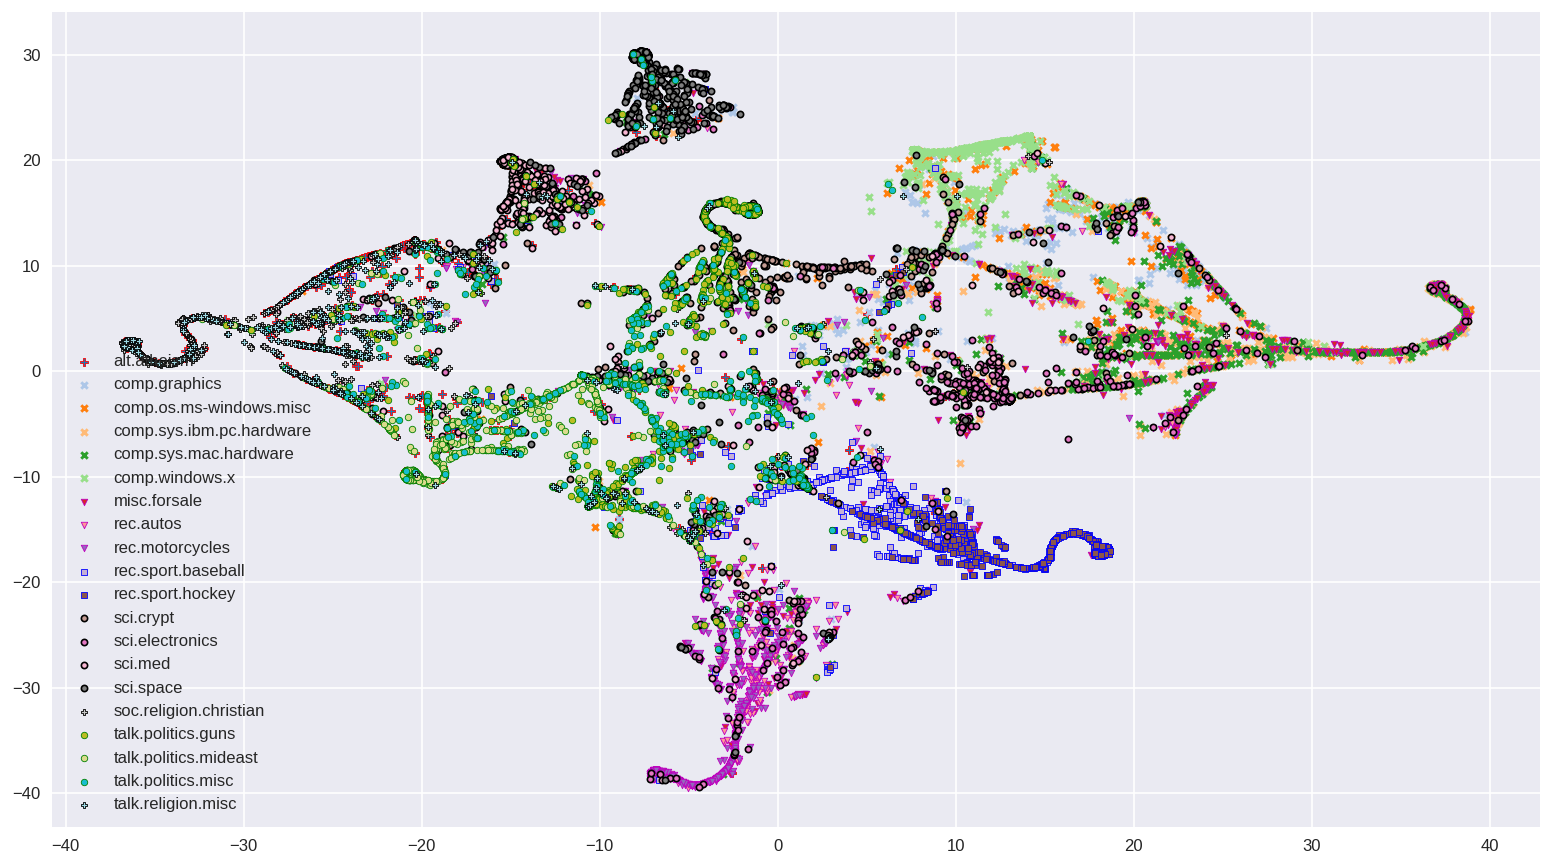

In [29]:
plot(X)  # learned document vectors

# different colors and markers represent 
# ground truth labels of each document

# open this image in new tab to see it better

In [0]:
doc_weights_init = np.load('20newsgroups/doc_weights_init.npy')

In [0]:
tsne = TSNE(perplexity=200, n_jobs=4)
Y = tsne.fit_transform(doc_weights_init.astype('float64'))

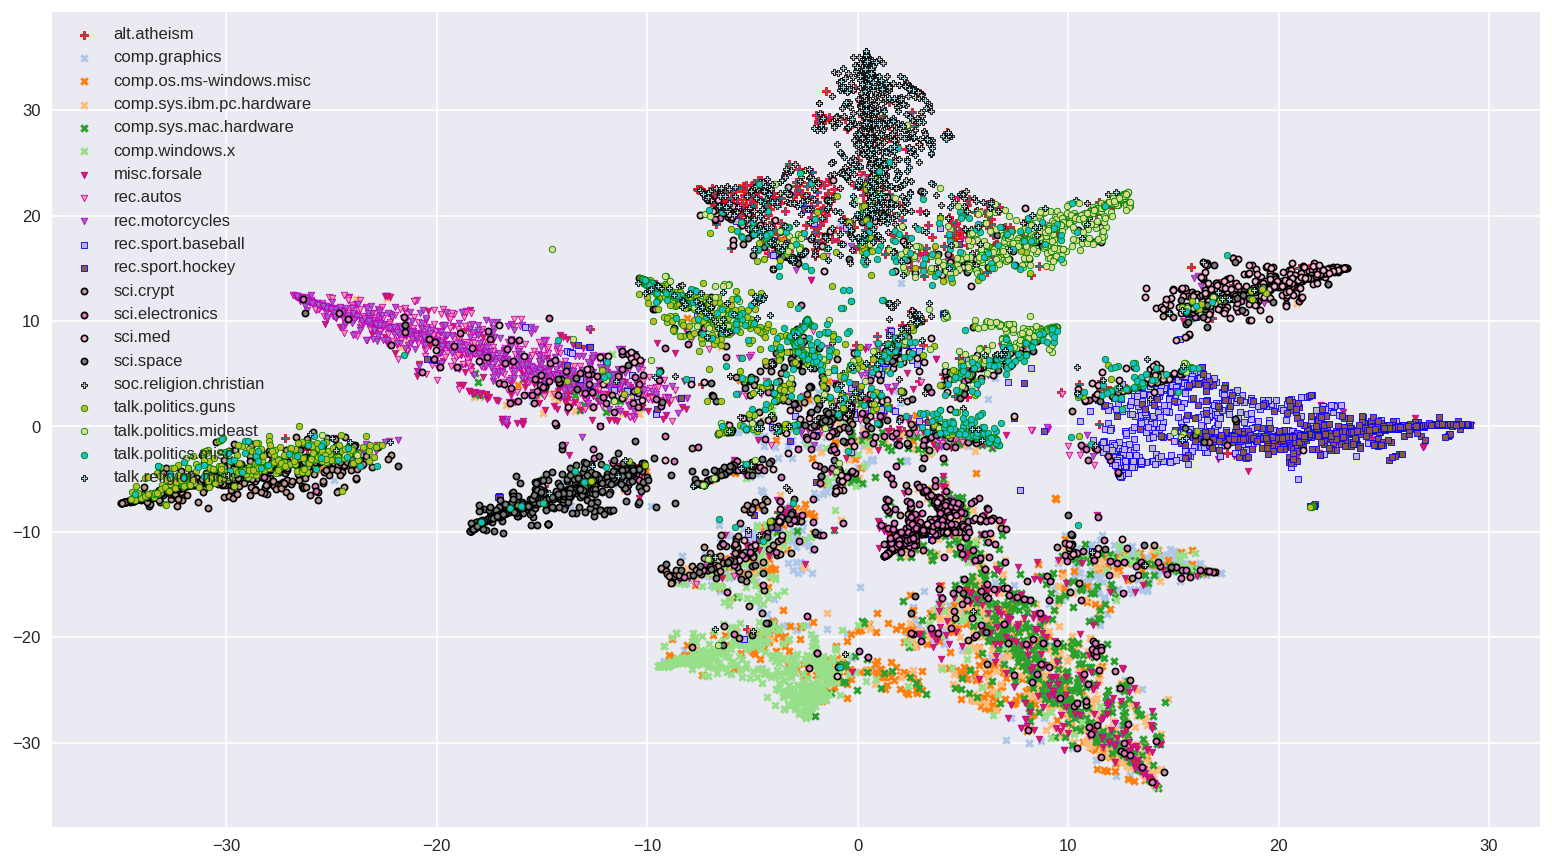

In [34]:
# to initialize topic assignments for lda2vec algorithm 
# I run normal LDA and used output distributions over topics 
# of each document

plot(Y)  # distribution over the topics for each document (output of LDA)

# different colors and markers represent 
# ground truth labels of each document

# open this image in new tab to see it better

In [0]:
tsne = TSNE(perplexity=200, n_jobs=4)
Z = tsne.fit_transform(topic_dist.astype('float64'))

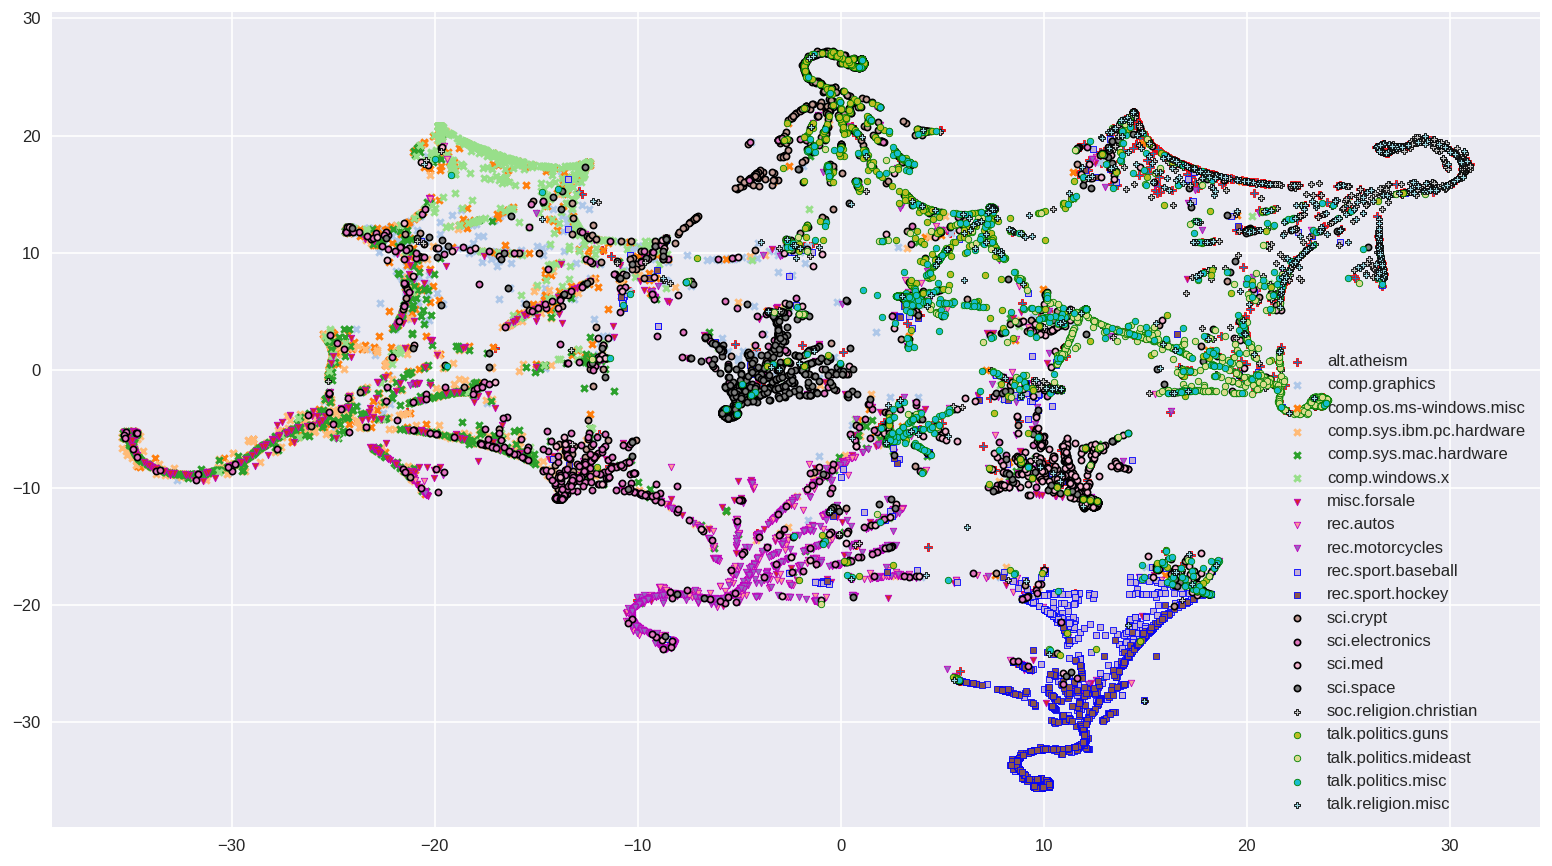

In [36]:
plot(Z)  # learned distribution over the topics for each document

# these are topic assignments as on the plot above 
# but these ones are after the training of lda2vec

# different colors and markers represent 
# ground truth labels of each document

# open this image in new tab to see it better

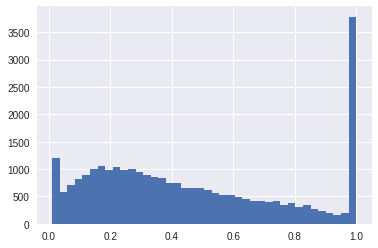

In [37]:
# distribution of nonzero probabilities
dist = topic_dist.reshape(-1)
plt.hist(dist[dist > 0.01], bins=40);

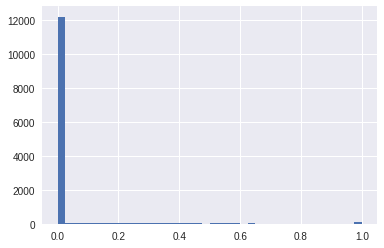

In [38]:
# distribution of probabilities for some random topic
plt.hist(topic_dist[:, 10], bins=40);

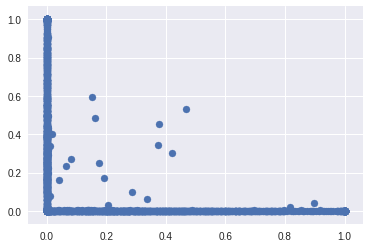

In [41]:
# topic assignments for two random topics
plt.scatter(topic_dist[:, 10], topic_dist[:, 20]);

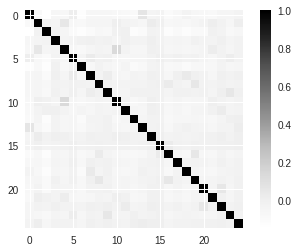

In [42]:
# correlation of topic assignments
corr = np.corrcoef(topic_dist.transpose(1, 0))
plt.imshow(corr);
plt.colorbar();

In [43]:
i = 100 # document id

print('DOCUMENT:')
print([doc for j, doc in docs if j == doc_decoder[i]][0], '\n')

print('DISTRIBUTION OVER TOPICS:')
s = ''
for j, p in enumerate(topic_dist[i], 1):
    s += '{0}:{1:.3f}  '.format(j, p)
    if j%6 == 0:
        s += '\n'
print(s)

print('\nTOP TOPICS:')
for j in reversed(topic_dist[i].argsort()[-3:]):
    topic_words = ' '.join([decoder[i] for i in reversed(most_similar[j])])
    print('topic', j + 1, ':', topic_words)

DOCUMENT:


IDE also uses DMA techniques.  I believe floppy controller also uses DMA,
and most A/D boards also use DMA.  DMA is no big deal, and has nothing to
do directly with SCSI.


You can thank your software for that.  If DOS had a few more brains, it
could format floppies etc. while you were doing something else.  The
hardware will support it, but DOS (at least) won't.  Again, this has   
nothing to do with SCSI.


And if you stick with DOS you'll wonder why you can't multitask. 

DISTRIBUTION OVER TOPICS:
1:0.000  2:0.000  3:0.999  4:0.000  5:0.000  6:0.000  
7:0.000  8:0.000  9:0.000  10:0.000  11:0.000  12:0.000  
13:0.000  14:0.000  15:0.000  16:0.000  17:0.000  18:0.000  
19:0.000  20:0.000  21:0.000  22:0.000  23:0.000  24:0.000  
25:0.000  

TOP TOPICS:
topic 3 : card disk scsi controller driver port meg dos ide video
topic 18 : food doctor msg patient diet symptom treatment candida hernia allergic
topic 9 : batting detector baerga runner hit hitter ball bonds baseman clut